## Evaluate the current status of the nanocosms

all data are imported and summarized then a panel with all trajectories is created.

In [1]:
import os; os.chdir("..")  # change into root of working directory
import sys; sys.path.append("src")  # add src to system path and allow packages to be found
import pandas as pd
import itertools as it
import numpy as np
from matplotlib import pyplot as plt
import evaluation.calc as calc
from image.analysis import Data

In [7]:
data = pd.read_csv("data/measurements.csv")
data.fillna(0, inplace=True)

plot panels with trajectories of culex. Dates, where larvae counts of the image detection are exchanged with manual larvae counts have to be manually specified.

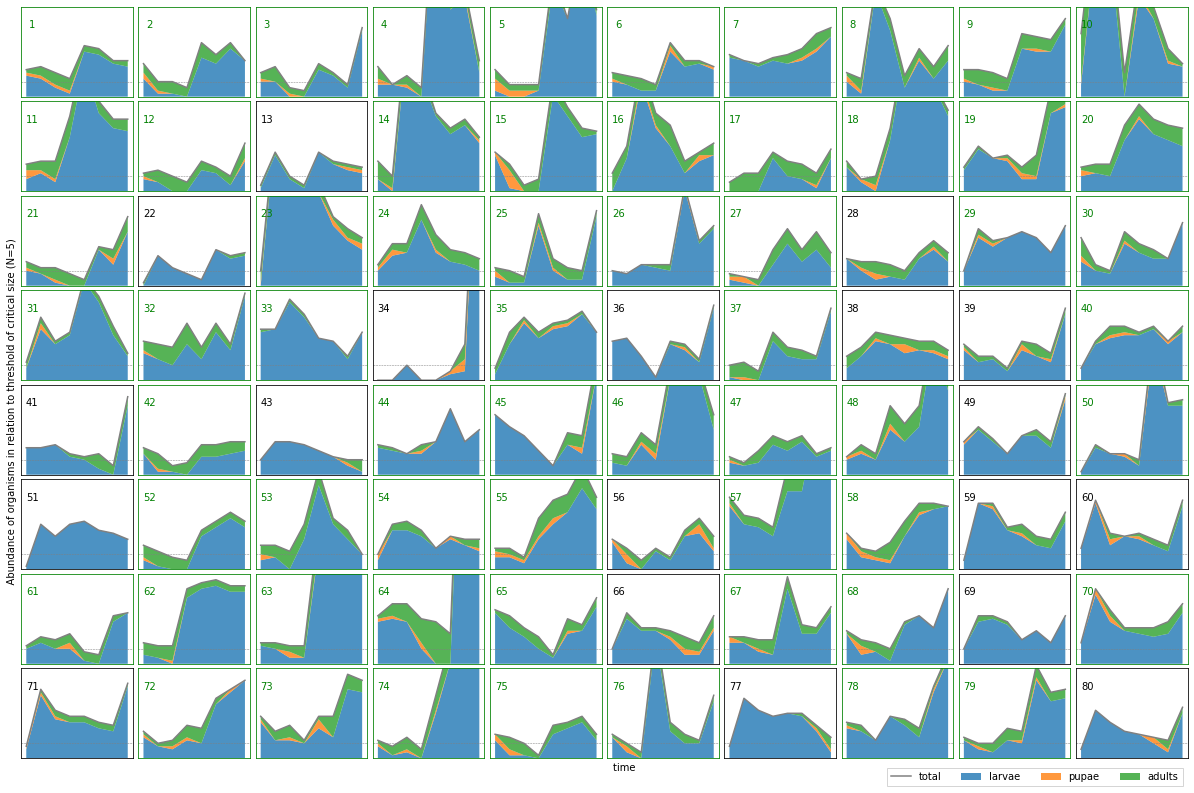

In [12]:
pdat = data.reset_index().query("time == '2021-04-09' | time == '2021-04-16' | time == '2021-04-23' | time == '2021-04-30' | time == '2021-05-07' | time == '2021-05-14' | time == '2021-05-20' | time == '2021-05-27'")
pdat["larvae"] = pdat["culex_larvae"] + pdat["culex_small"]
pdat["culex"] = pdat["larvae"] + pdat["culex_adults"] + pdat["culex_pupae"]
pdat.rename(columns={"culex_adults":"adults", "culex_pupae":"pupae"}, inplace=True)

fig, axes = plt.subplots(figsize=(18,12), ncols=10, nrows=8, sharex=True)
axes = axes.flatten()
for ax, i in zip(axes, np.arange(1, 81)):
    dd = pdat.query("id == @i")
    l, = ax.plot(dd["time"], dd["culex"], label="total", color="gray")
    l = ax.fill_between(dd["time"], [0], dd["larvae"], 
                        alpha=.8, label="larvae")
    l = ax.fill_between(dd["time"], dd["larvae"], dd["larvae"] + dd["pupae"], 
                        alpha=.8, label="pupae")
    l = ax.fill_between(dd["time"], dd["larvae"] + dd["pupae"], dd["larvae"] + dd["pupae"] + dd["adults"],
                        alpha=.8, label="adults")
    ax.axhline(5, 0 , 100, linestyle="--", color="gray", linewidth=.5)
    ax.set_ylim(0,30)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.1, 0.8, str(i), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)        # ax.set_ylabel("Abundance")
    
    # color panels conditional on status
    if any(dd.culex_repro) == True:
        plt.setp(ax.spines.values(), color="green")
        plt.setp(ax.texts, color="green")
    elif dd.culex.to_numpy()[-1] < 5:
        plt.setp(ax.spines.values(), color="red")
        plt.setp(ax.texts, color="red")


fig.subplots_adjust(bottom=0.08, wspace=0.05, hspace=0.05, top=.95, right=0.95, left=0.05)

handles = [axes[2].lines[0]] + axes[2].collections

axes[79].legend(handles = handles, labels=["total", "larvae", "pupae", "adults"], loc='upper right', 
                bbox_to_anchor=(1, -0.05),fancybox=False, shadow=False, ncol=4)
axes[75].set_xlabel("time                         ")
axes[40].set_ylabel("            Abundance of organisms in relation to threshold of critical size (N=5)")
 
plt.savefig("plots/status_culex.jpeg")
plt.show()
